In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

In [2]:
abo_path = 'D:/Users/masoodw/ML_FINANCE/asigmo/github/asigmo/data/titanic/train.csv'
p_df_raw_train = pd.read_csv(abo_path, sep=',', encoding="UTF-8")

In [14]:
p_df_raw_train.tail(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NA,S
792,793,0,3,"Sage, Miss. Stella Anna",female,-1.0,8,2,CA. 2343,69.5500,NA,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,-1.0,0,0,PC 17600,30.6958,NA,C
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NA,S
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NA,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NA,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,NA,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
p_df_raw_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
p_df_raw_train.Age = p_df_raw_train.Age.fillna(-1)
p_df_raw_train.Cabin = p_df_raw_train.Cabin.fillna('NA')
p_df_raw_train.Embarked = p_df_raw_train.Embarked.fillna('NA')

## Check class frequencies

In [4]:
y = p_df_raw_train.Survived
sum(y), sum(y)/len(y)*100

(342, 38.38383838383838)

### Preprocessing

In [15]:
df_y = p_df_raw_train['Survived']
#df_X_raw = p_df_raw_train.drop(['Name'], axis=1)
df_X_raw = p_df_raw_train.drop(['Name', 'Survived', 'PassengerId'], axis=1)

columns=df_X_raw.columns
for f in df_X_raw.columns:
    if df_X_raw[f].dtype == 'object':
        df_X_raw[f] = LabelEncoder().fit_transform(list(df_X_raw[f]))        

In [26]:
df_X_raw.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,523,7.2500,146,3
1,1,0,38.0,1,0,596,71.2833,81,0
2,3,0,26.0,0,0,669,7.9250,146,3
3,1,0,35.0,1,0,49,53.1000,55,3
4,3,1,35.0,0,0,472,8.0500,146,3


In [27]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_X_raw)
df_X = pd.DataFrame(scaled_df, columns=columns)

In [28]:
df_X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.827377,0.737695,-0.089634,0.432793,-0.473674,0.918966,-0.502445,0.449441,0.562734
1,-1.566107,-1.355574,0.806350,0.432793,-0.473674,1.282625,0.786845,-1.373473,-2.008526
2,0.827377,-1.355574,0.134362,-0.474545,-0.473674,1.646283,-0.488854,0.449441,0.562734
3,-1.566107,-1.355574,0.638353,0.432793,-0.473674,-1.442322,0.420730,-2.102639,0.562734
4,0.827377,0.737695,0.638353,-0.474545,-0.473674,0.664904,-0.486337,0.449441,0.562734


In [20]:
class_labels = np.unique(y)
class_weights = compute_class_weight('balanced', class_labels, y)
class_weights = dict(zip(class_labels, class_weights))

c:\programdata\anaconda3\envs\asigmo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [21]:
class_weights

{0: 0.8114754098360656, 1: 1.3026315789473684}

### Default parameters

In [52]:
penalty='l2', ### 'elastic'
dual=False,
tol=0.0001,
C=1.0,
fit_intercept=True,
intercept_scaling=1,
class_weight=None,
random_state=None,
solver='lbfgs',
max_iter=100,
multi_class='auto',
verbose=0,
warm_start=False,
n_jobs=None,
l1_ratio=None

In [24]:
clf = LogisticRegression(random_state=0, class_weight=class_weights)

In [29]:
clf.fit(df_X, df_y)

LogisticRegression(class_weight={0: 0.8114754098360656, 1: 1.3026315789473684},
                   random_state=0)

In [30]:
clf_train_pred = clf.predict(df_X)

In [34]:
auc_train = roc_auc_score(df_y, clf_train_pred)
print('\nAUROC.....', auc_train)


AUROC..... 0.772648835202761


In [38]:
fpr, tpr, threshold = roc_curve(df_y, clf_train_pred)

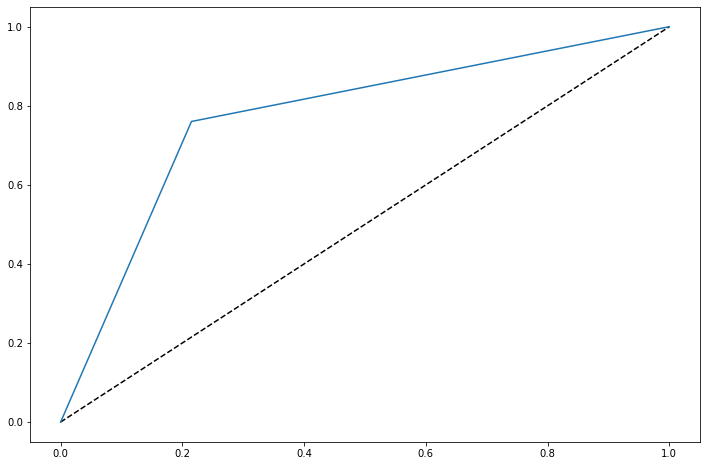

In [39]:
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(1,1,1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)

In [45]:
print('Accuracy')
print(accuracy_score(df_y, clf_train_pred))
print('Confusion Matrix')
print(confusion_matrix(df_y, clf_train_pred))
print('Confusion Report')
print(classification_report(df_y, clf_train_pred))
print('F-Score')
print(f1_score(df_y, clf_train_pred))

Accuracy
0.7755331088664422
Confusion Matrix
[[431 118]
 [ 82 260]]
Confusion Report
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       549
           1       0.69      0.76      0.72       342

    accuracy                           0.78       891
   macro avg       0.76      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891

F-Score
0.7222222222222221


### Rpeat the above stats for test data

### saving/loading the model

In [48]:
joblib.dump(clf, 'logistic_regression.pkl')

['logistic_regression.pkl']

In [49]:
clf_pickle = joblib.load('logistic_regression.pkl')

In [50]:
clf_train_pred = clf.predict(df_X)

#### Test results 

In [51]:
abo_path = 'D:/Users/masoodw/ML_FINANCE/asigmo/github/asigmo/data/titanic/test.csv'
p_df_raw_test = pd.read_csv(abo_path, sep=',', encoding="UTF-8")

In [52]:
p_df_raw_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
